<a href="https://colab.research.google.com/github/khanabdullahbelal/Data-Structure/blob/main/SVM_%26_Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment Questions

1. What is a Support Vector Machine (SVM)?

SVM is a supervised algorithm used for classification and regression.

It finds a decision boundary with the maximum margin.

Example:
Separating spam vs non-spam emails using a straight line.

2. What is the difference between Hard Margin and Soft Margin SVM ?

Hard Margin allows no misclassification; Soft Margin allows some errors.

Hard Margin works only for clean data; Soft Margin handles noisy data.

Example:
Soft Margin is used when student marks overlap between pass/fail.

3.  What is the mathematical intuition behind SVM

SVM maximizes the distance between classes.

Larger margin leads to better generalization.

Example:
Choosing the widest road between two groups of points.

4. What is the role of Lagrange Multipliers in SVM

They help solve constrained optimization problems.

They identify important data points (support vectors).

Example:
Only nearby points affect the separating line.

5.  What are Support Vectors in SVM

Closest points to the decision boundary.

They define the margin and hyperplane.

Example:
Boundary shifts if a support vector moves.

6.  What is a Support Vector Classifier (SVC)

SVC is SVM used for classification.

Output is categorical.

Example:
Classifying emails as spam or not spam.

 7. What is a Support Vector Regressor (SVR)

SVR is SVM used for regression.

It predicts continuous values within a margin.

Example:
Predicting house prices.

8. What is the Kernel Trick in SVM

Converts non-linear data into higher dimensions.

Avoids explicit high-dimensional computation.

Example:
Separating circular data using RBF kernel.

9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel

Linear kernel is used for linearly separable data, Polynomial kernel handles curved boundaries, and RBF kernel handles highly non-linear data.

Linear is simplest and fastest, Polynomial adds complexity, and RBF is the most flexible.

Example:
Linear kernel for spam detection, Polynomial for pattern recognition, and RBF kernel for image classification.

10. What is the effect of the C parameter in SVM

A high value of C forces the model to classify training data correctly, which can lead to overfitting.

A low value of C allows more misclassification, resulting in a wider margin and better generalization.

Example:
In exam score classification, a high C tries to separate every student perfectly, while a low C allows small mistakes for a simpler boundary.

11. What is the role of the Gamma parameter in RBF Kernel SVM

Gamma controls how much influence a single training data point has on the decision boundary.

High gamma makes the boundary very tight (overfitting), while low gamma makes it smoother (underfitting).

Example:
With high gamma, the model fits every small cluster of points; with low gamma, it draws a smooth curve ignoring small variations.

12. What is the Naïve Bayes classifier, and why is it called "Naïve"

Naïve Bayes is a probabilistic classification algorithm based on Bayes’ Theorem.

It is called “Naïve” because it assumes all features are independent of each other.

Example:
In spam detection, each word in an email is treated independently to decide whether the email is spam or not.

13. What is Bayes’ Theorem

Bayes’ Theorem calculates the probability of an event using prior knowledge and new evidence.

It updates the probability of a hypothesis when more data becomes available.

Example:
Finding the probability of a disease given a positive medical test result.

14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes

Gaussian Naïve Bayes is used for continuous data, Multinomial Naïve Bayes for count-based data, and Bernoulli Naïve Bayes for binary data.

Gaussian assumes normal distribution, Multinomial uses frequency of features, and Bernoulli checks presence or absence.

Example:
Gaussian NB for medical measurements, Multinomial NB for spam emails, and Bernoulli NB for yes/no word occurrence.

15. When should you use Gaussian Naïve Bayes over other variants

Use Gaussian Naïve Bayes when the features are continuous values.

It is suitable when data approximately follows a normal (Gaussian) distribution.

Example:
Predicting a disease based on continuous medical measurements like blood pressure and sugar level.

16. What are the key assumptions made by Naïve Bayes

All features are assumed to be independent of each other given the class.

Each feature contributes equally to the final prediction.

Example:
In email spam detection, each word is treated as independent from other words.

17. What are the advantages and disadvantages of Naïve Bayes

Advantages: Simple, fast, and works well with large and high-dimensional datasets.

Disadvantages: Assumes feature independence and performs poorly when features are highly correlated.

Example:
Naïve Bayes works well for spam email classification but struggles with image data where pixels are correlated.

18. Why is Naïve Bayes a good choice for text classification4

Text data is high-dimensional and sparse, which Naïve Bayes handles efficiently.

The independence assumption works well for word-based features.

Example:
Classifying emails as spam or not spam using word frequencies.

19.  Compare SVM and Naïve Bayes for classification tasks

SVM provides higher accuracy by finding an optimal margin, while Naïve Bayes is faster and simpler.

SVM works well with complex boundaries, whereas Naïve Bayes works better with very large text datasets.

Example:
SVM is used for image classification, while Naïve Bayes is commonly used for spam email detection.

20. How does Laplace Smoothing help in Naïve Bayes

It prevents zero probability for unseen features in the training data.

It improves model stability by assigning a small probability to all features.

Example:
If a new word appears in a test email, Laplace smoothing ensures the spam probability does not become zero.

Practical Questions

In [ ]:
# 21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy

Accuracy of SVM Classifier: 1.000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



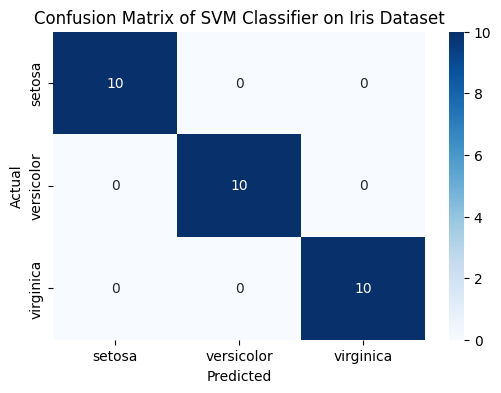

In [8]:
# svm_iris.py

# Import required libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def main():
    # Load Iris dataset
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target

    # Split data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Scale features (SVM performs better with scaled data)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train SVM classifier with linear kernel
    svm_model = SVC(kernel='linear', C=1.0, random_state=42)
    svm_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = svm_model.predict(X_test_scaled)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of SVM Classifier: {accuracy:.3f}\n")

    # Detailed classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix of SVM Classifier on Iris Dataset")
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
# 22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then
#    compare their accuracies

Accuracy of Linear Kernel SVM: 0.944
Accuracy of RBF Kernel SVM: 0.972

RBF Kernel performs better on the Wine dataset.


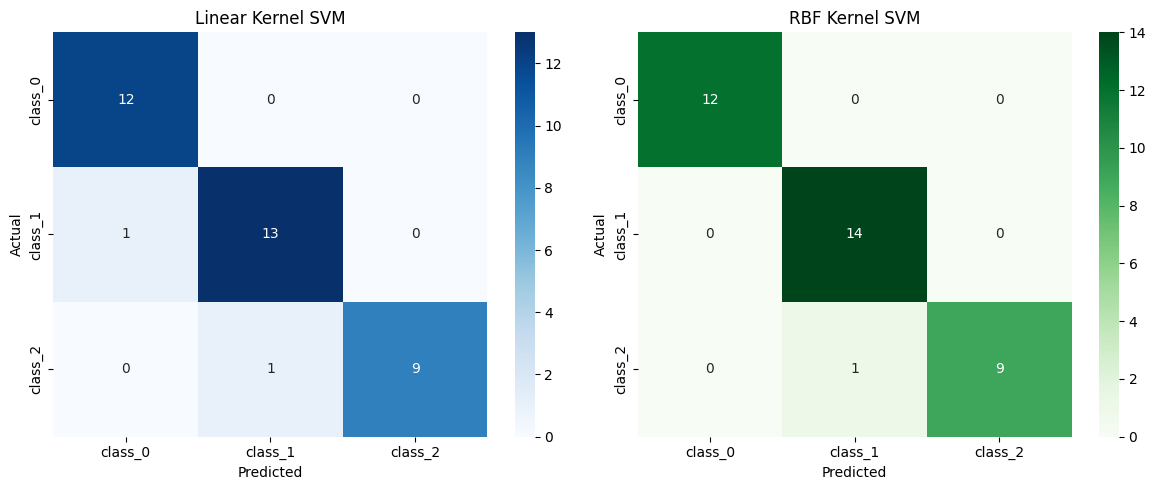

In [9]:
# svm_wine_comparison.py

# Import required libraries
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def main():
    # Load Wine dataset
    wine = load_wine()
    X = wine.data
    y = wine.target
    class_names = wine.target_names

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Feature scaling (important for SVM)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train SVM with Linear Kernel
    svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
    svm_linear.fit(X_train_scaled, y_train)
    y_pred_linear = svm_linear.predict(X_test_scaled)
    accuracy_linear = accuracy_score(y_test, y_pred_linear)

    # Train SVM with RBF Kernel
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
    svm_rbf.fit(X_train_scaled, y_train)
    y_pred_rbf = svm_rbf.predict(X_test_scaled)
    accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

    # Print accuracies
    print(f"Accuracy of Linear Kernel SVM: {accuracy_linear:.3f}")
    print(f"Accuracy of RBF Kernel SVM: {accuracy_rbf:.3f}\n")

    # Determine which kernel performs better
    if accuracy_linear > accuracy_rbf:
        print("Linear Kernel performs better on the Wine dataset.")
    elif accuracy_rbf > accuracy_linear:
        print("RBF Kernel performs better on the Wine dataset.")
    else:
        print("Both kernels perform equally well on the Wine dataset.")

    # Optional: Visualize confusion matrices for both
    fig, axes = plt.subplots(1, 2, figsize=(12,5))
    cm_linear = confusion_matrix(y_test, y_pred_linear)
    cm_rbf = confusion_matrix(y_test, y_pred_rbf)

    sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axes[0])
    axes[0].set_title("Linear Kernel SVM")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")

    sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names, ax=axes[1])
    axes[1].set_title("RBF Kernel SVM")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
# 23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean
#    Squared Error (MSE)

Mean Squared Error (MSE): 12.552
R² Score: 0.829


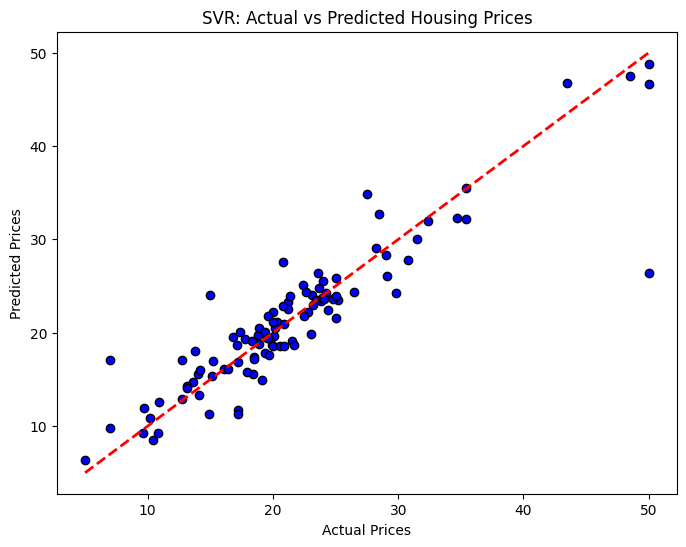

In [7]:
# svr_housing.py

# Import necessary libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def main():
    # Load Boston Housing dataset
    boston = fetch_openml(name="boston", version=1, as_frame=True)
    X = boston.data
    y = boston.target.astype(np.float64)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Scale features (important for SVR)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train SVR model
    svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
    svr_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = svr_model.predict(X_test_scaled)

    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error (MSE): {mse:.3f}")
    print(f"R² Score: {r2:.3f}")

    # Optional: Plot Actual vs Predicted
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title("SVR: Actual vs Predicted Housing Prices")
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
# 24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision
#     boundary

Accuracy of Polynomial Kernel SVM: 0.700


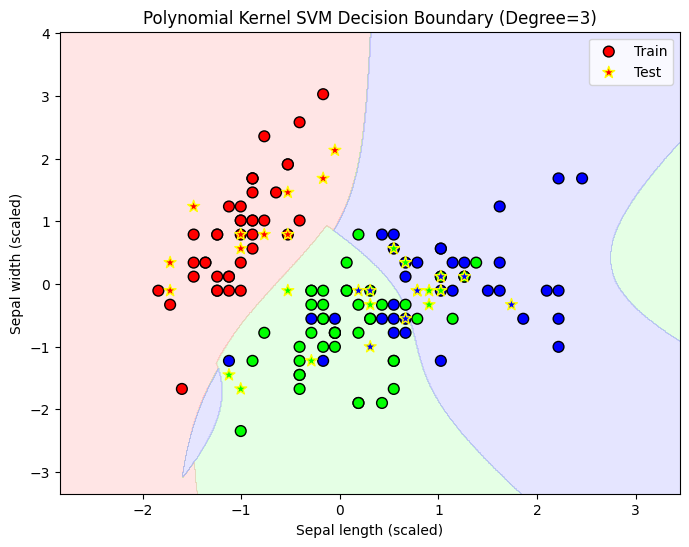

In [12]:
# svm_polynomial_visualization.py

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

def main():
    # Load Iris dataset
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # only first two features for 2D visualization
    y = iris.target

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train SVM with Polynomial Kernel
    svm_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', coef0=1.0)
    svm_poly.fit(X_train_scaled, y_train)

    # Evaluate accuracy
    accuracy = svm_poly.score(X_test_scaled, y_test)
    print(f"Accuracy of Polynomial Kernel SVM: {accuracy:.3f}")

    # Visualize decision boundary
    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=60, label='Train')
    plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=cmap_bold, edgecolor='yellow', s=80, marker='*', label='Test')
    plt.xlabel('Sepal length (scaled)')
    plt.ylabel('Sepal width (scaled)')
    plt.title('Polynomial Kernel SVM Decision Boundary (Degree=3)')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
# 25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and
#.    evaluate accuracy

Accuracy of Gaussian Naïve Bayes: 0.930

Classification Report:
              precision    recall  f1-score   support

   malignant       0.90      0.90      0.90        42
      benign       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



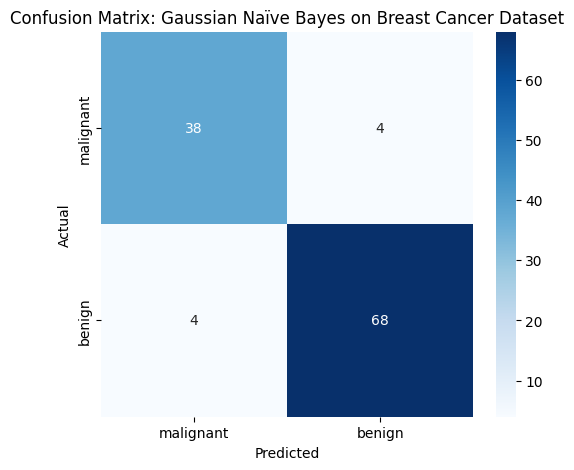

In [13]:
# gnb_breast_cancer.py

# Import necessary libraries
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def main():
    # Load Breast Cancer dataset
    data = load_breast_cancer()
    X = data.data
    y = data.target
    class_names = data.target_names

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Optional: Scale features (GaussianNB is less sensitive, but scaling can help visualization)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train Gaussian Naïve Bayes classifier
    gnb = GaussianNB()
    gnb.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = gnb.predict(X_test_scaled)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of Gaussian Naïve Bayes: {accuracy:.3f}\n")

    # Detailed classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix: Gaussian Naïve Bayes on Breast Cancer Dataset")
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
# 26.Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20
#   Newsgroups dataset.

Accuracy of Multinomial Naïve Bayes: 0.736

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.81      0.28      0.41       160
           comp.graphics       0.76      0.74      0.75       195
 comp.os.ms-windows.misc       0.75      0.68      0.71       197
comp.sys.ibm.pc.hardware       0.64      0.81      0.71       196
   comp.sys.mac.hardware       0.88      0.71      0.79       193
          comp.windows.x       0.86      0.89      0.88       198
            misc.forsale       0.84      0.77      0.80       195
               rec.autos       0.80      0.75      0.77       198
         rec.motorcycles       0.89      0.69      0.78       199
      rec.sport.baseball       0.91      0.82      0.87       199
        rec.sport.hockey       0.56      0.95      0.71       200
               sci.crypt       0.75      0.86      0.80       198
         sci.electronics       0.85      0.75      0.80       197
        

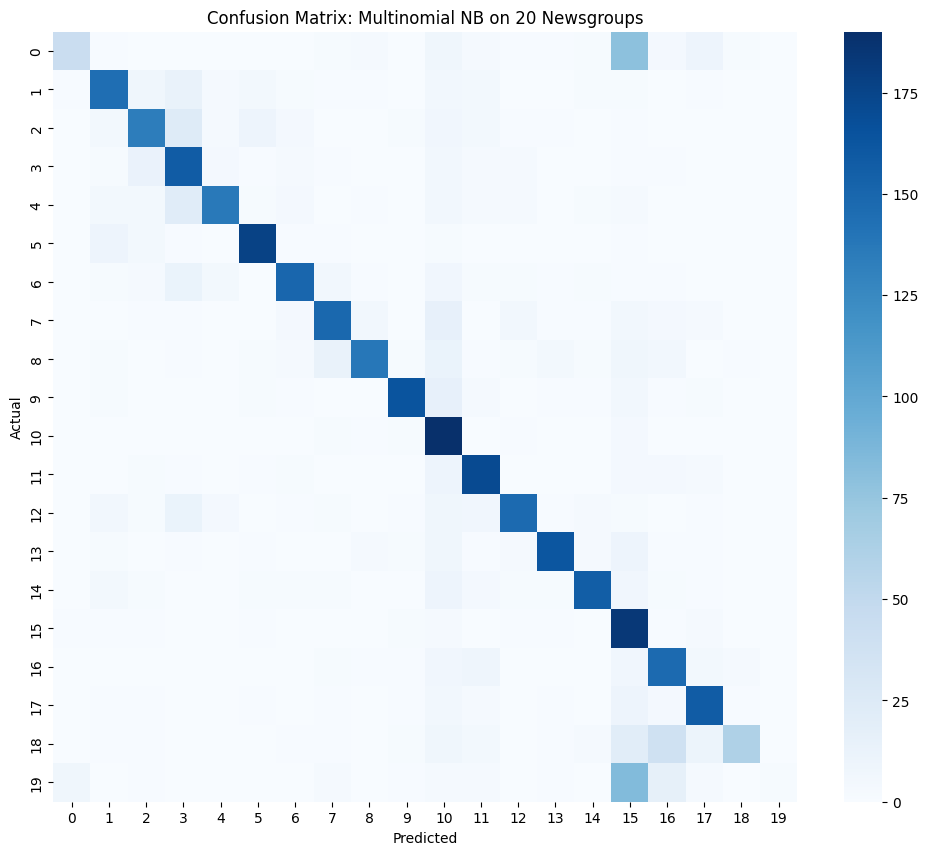

In [16]:
# multinomial_nb_20newsgroups.py

# Import required libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def main():
    # Load 20 Newsgroups dataset
    categories = None  # You can select categories or use all
    newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers','footers','quotes'))
    X = newsgroups.data
    y = newsgroups.target
    target_names = newsgroups.target_names

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Convert text data to TF-IDF features
    vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Train Multinomial Naïve Bayes classifier
    mnb = MultinomialNB()
    mnb.fit(X_train_tfidf, y_train)

    # Make predictions
    y_pred = mnb.predict(X_test_tfidf)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of Multinomial Naïve Bayes: {accuracy:.3f}\n")

    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Optional: Confusion matrix (top 10 classes for readability)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12,10))
    sns.heatmap(cm, annot=False, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix: Multinomial NB on 20 Newsgroups")
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
# 27.Write a Python program to train an SVM Classifier with different C values and compare the decision
#    boundaries visually

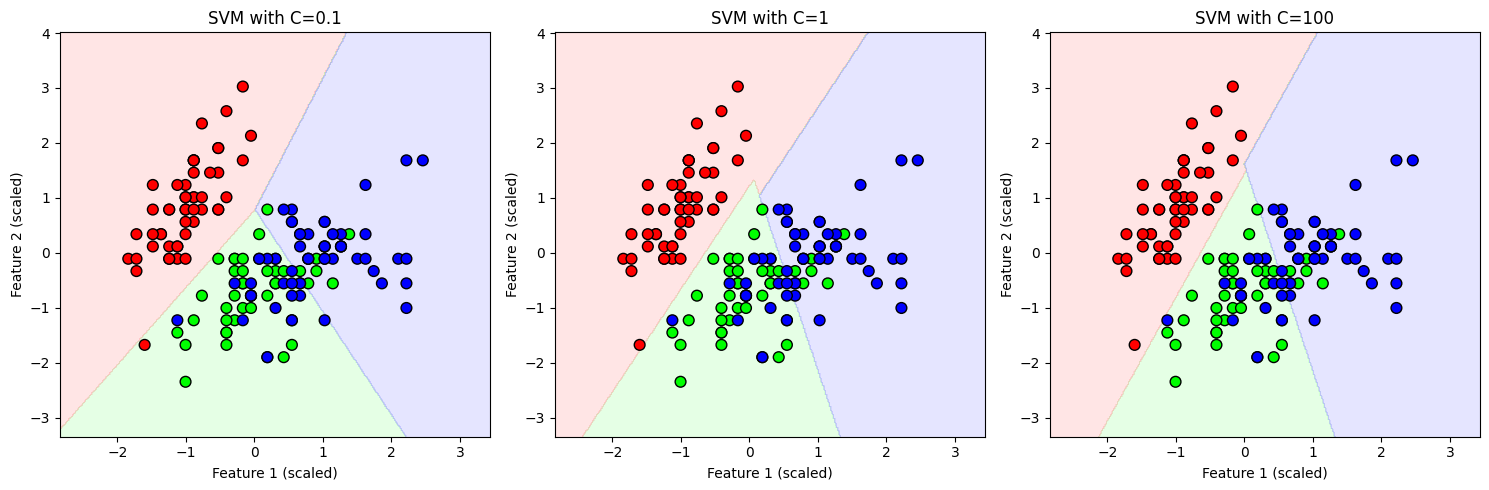

In [18]:
# svm_c_comparison.py

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, y, classifiers, titles, h=0.02):
    """
    Plots decision boundaries for multiple classifiers.
    X: feature matrix (2D)
    y: labels
    classifiers: list of trained classifiers
    titles: list of titles for each subplot
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.figure(figsize=(15, 5))

    for i, clf in enumerate(classifiers):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.subplot(1, len(classifiers), i + 1)
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=60)
        plt.title(titles[i])
        plt.xlabel('Feature 1 (scaled)')
        plt.ylabel('Feature 2 (scaled)')

    plt.tight_layout()
    plt.show()


def main():
    # Load Iris dataset (use first two features for visualization)
    iris = datasets.load_iris()
    X = iris.data[:, :2]
    y = iris.target

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_scaled = scaler.transform(X)  # for plotting all points

    # Train SVM classifiers with different C values
    C_values = [0.1, 1, 100]
    classifiers = []
    titles = []

    for C in C_values:
        svm = SVC(kernel='linear', C=C, random_state=42)
        svm.fit(X_train_scaled, y_train)
        classifiers.append(svm)
        titles.append(f'SVM with C={C}')

    # Plot decision boundaries
    plot_decision_boundaries(X_scaled, y, classifiers, titles)

if __name__ == "__main__":
    main()


In [ ]:
# 28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with
#     binary features

Accuracy of Bernoulli Naïve Bayes: 0.880

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.89      0.87      0.88       101
     Class 1       0.87      0.89      0.88        99

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



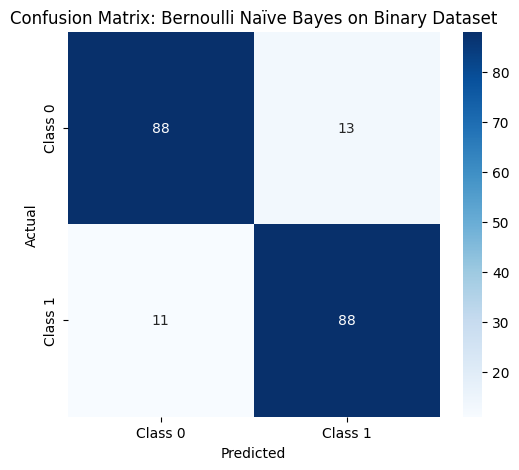

In [19]:
# bernoulli_nb_binary.py

# Import required libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def main():
    # Generate synthetic binary classification dataset
    X, y = make_classification(
        n_samples=1000,     # total samples
        n_features=10,      # total features
        n_informative=5,    # informative features
        n_redundant=0,      # redundant features
        n_repeated=0,       # repeated features
        n_classes=2,        # binary classification
        n_clusters_per_class=2,
        flip_y=0.05,        # small label noise
        class_sep=1.5,
        random_state=42
    )

    # Binarize features (convert continuous to binary)
    X_binary = np.where(X > 0, 1, 0)

    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_binary, y, test_size=0.2, random_state=42, stratify=y
    )

    # Train Bernoulli Naïve Bayes classifier
    bnb = BernoulliNB()
    bnb.fit(X_train, y_train)

    # Make predictions
    y_pred = bnb.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of Bernoulli Naïve Bayes: {accuracy:.3f}\n")

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

    # Confusion matrix visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix: Bernoulli Naïve Bayes on Binary Dataset")
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
# 29. Write a Python program to apply feature scaling before training an SVM model and compare results with
#.    unscaled data

Accuracy without feature scaling: 0.733


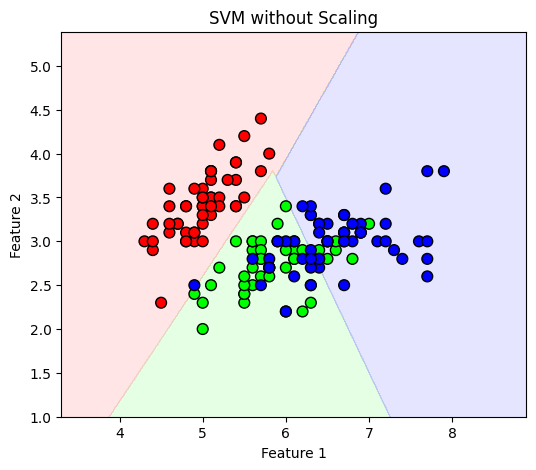

Accuracy with feature scaling: 0.733


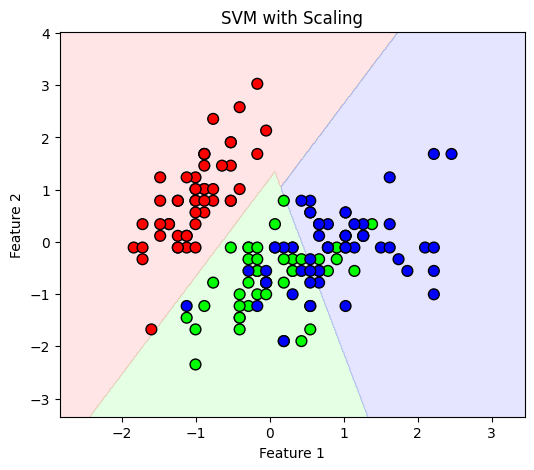

In [20]:
# svm_scaling_comparison.py

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, clf, title):
    """
    Plots decision boundary for 2D features
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=60)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

def main():
    # Load Iris dataset (use first two features for visualization)
    iris = datasets.load_iris()
    X = iris.data[:, :2]
    y = iris.target

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # -----------------------------
    # 1. Train SVM without scaling
    # -----------------------------
    svm_unscaled = SVC(kernel='linear', C=1.0, random_state=42)
    svm_unscaled.fit(X_train, y_train)
    y_pred_unscaled = svm_unscaled.predict(X_test)
    acc_unscaled = accuracy_score(y_test, y_pred_unscaled)
    print(f"Accuracy without feature scaling: {acc_unscaled:.3f}")

    # Plot decision boundary
    plot_decision_boundary(X, y, svm_unscaled, "SVM without Scaling")

    # -----------------------------
    # 2. Train SVM with scaling
    # -----------------------------
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_scaled_all = scaler.transform(X)  # for plotting

    svm_scaled = SVC(kernel='linear', C=1.0, random_state=42)
    svm_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled = svm_scaled.predict(X_test_scaled)
    acc_scaled = accuracy_score(y_test, y_pred_scaled)
    print(f"Accuracy with feature scaling: {acc_scaled:.3f}")

    # Plot decision boundary
    plot_decision_boundary(X_scaled_all, y, svm_scaled, "SVM with Scaling")

if __name__ == "__main__":
    main()


In [ ]:
# 30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and
#.    after Laplace Smoothing

In [22]:
# gnb_laplace_comparison.py

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

def main():
    # Load Iris dataset
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Discretize features for MultinomialNB (to simulate categorical features)
    X_discrete = np.floor(X).astype(int)

    # Split dataset
    X_train_g, X_test_g, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    X_train_m, X_test_m, _, _ = train_test_split(
        X_discrete, y, test_size=0.2, random_state=42, stratify=y
    )

    # -------------------------
    # Gaussian Naïve Bayes
    # -------------------------
    gnb = GaussianNB()
    gnb.fit(X_train_g, y_train)
    y_pred_gnb = gnb.predict(X_test_g)
    acc_gnb = accuracy_score(y_test, y_pred_gnb)
    print("Gaussian Naïve Bayes Accuracy (continuous features):", acc_gnb)
    print(classification_report(y_test, y_pred_gnb, target_names=iris.target_names))

    # -------------------------
    # MultinomialNB with Laplace smoothing (alpha=1)
    # -------------------------
    mnb = MultinomialNB(alpha=1.0)  # Laplace smoothing applied
    mnb.fit(X_train_m, y_train)
    y_pred_mnb = mnb.predict(X_test_m)
    acc_mnb = accuracy_score(y_test, y_pred_mnb)
    print("Multinomial Naïve Bayes Accuracy (with Laplace smoothing):", acc_mnb)
    print(classification_report(y_test, y_pred_mnb, target_names=iris.target_names))

if __name__ == "__main__":
    main()


Gaussian Naïve Bayes Accuracy (continuous features): 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Multinomial Naïve Bayes Accuracy (with Laplace smoothing): 0.8333333333333334
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.67      1.00      0.80        10
   virginica       1.00      0.50      0.67        10

    accuracy                           0.83        30
   macro avg       0.89      0.83      0.82        30
weighted avg       0.89      0.83      0.82        30



In [ ]:
# 31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C,
#     gamma, kernel)

In [23]:
# svm_gridsearch.py

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

def main():
    # Load Iris dataset
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Feature scaling (important for SVM)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define SVM classifier
    svm = SVC()

    # Define hyperparameter grid
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.01, 0.1, 1],
        'kernel': ['linear', 'rbf', 'poly']
    }

    # Setup GridSearchCV
    grid_search = GridSearchCV(
        estimator=svm,
        param_grid=param_grid,
        scoring='accuracy',
        cv=5,
        n_jobs=-1,
        verbose=2
    )

    # Train SVM with hyperparameter tuning
    grid_search.fit(X_train_scaled, y_train)

    # Best hyperparameters
    print("Best Hyperparameters:", grid_search.best_params_)

    # Evaluate on test set
    best_svm = grid_search.best_estimator_
    y_pred = best_svm.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Set Accuracy with Best Parameters: {accuracy:.3f}\n")

    # Detailed classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

if __name__ == "__main__":
    main()


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Test Set Accuracy with Best Parameters: 0.967

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
# 32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and
#     check it improve accuracy

=== SVM without class weighting ===

Accuracy: 0.920
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.92      1.00      0.96       180
     Class 1       1.00      0.20      0.33        20

    accuracy                           0.92       200
   macro avg       0.96      0.60      0.65       200
weighted avg       0.93      0.92      0.90       200



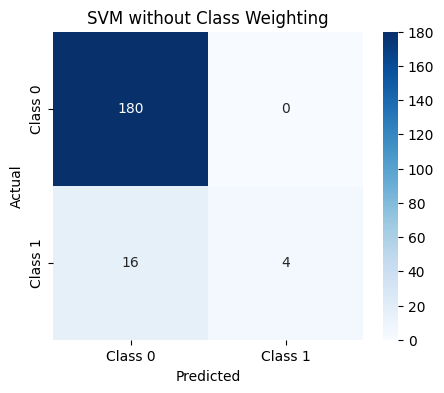


=== SVM with class weighting ===

Accuracy: 0.930
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      0.96      0.96       180
     Class 1       0.64      0.70      0.67        20

    accuracy                           0.93       200
   macro avg       0.80      0.83      0.81       200
weighted avg       0.93      0.93      0.93       200



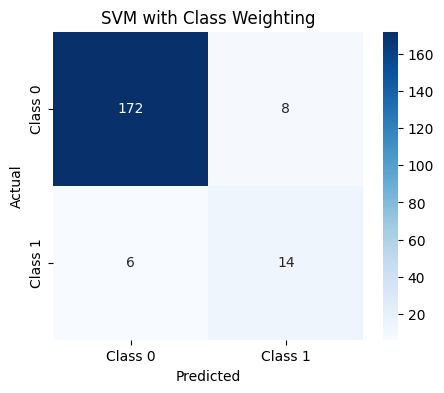


Accuracy Improvement: 0.010


In [24]:
# svm_class_weighting.py

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, title="Confusion Matrix"):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {acc:.3f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()
    return acc

def main():
    # Generate imbalanced dataset
    X, y = make_classification(
        n_samples=1000,
        n_features=10,
        n_informative=5,
        n_redundant=0,
        n_classes=2,
        weights=[0.9, 0.1],  # 90% of class 0, 10% class 1
        flip_y=0,
        random_state=42
    )

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # -------------------------
    # SVM without class weighting
    # -------------------------
    print("=== SVM without class weighting ===")
    svm_no_weight = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
    svm_no_weight.fit(X_train_scaled, y_train)
    acc_no_weight = evaluate_model(svm_no_weight, X_test_scaled, y_test, title="SVM without Class Weighting")

    # -------------------------
    # SVM with class weighting
    # -------------------------
    print("\n=== SVM with class weighting ===")
    svm_weighted = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', random_state=42)
    svm_weighted.fit(X_train_scaled, y_train)
    acc_weighted = evaluate_model(svm_weighted, X_test_scaled, y_test, title="SVM with Class Weighting")

    print(f"\nAccuracy Improvement: {acc_weighted - acc_no_weight:.3f}")

if __name__ == "__main__":
    main()


In [ ]:
# 33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data

Accuracy of Naïve Bayes Spam Classifier: 0.970

Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



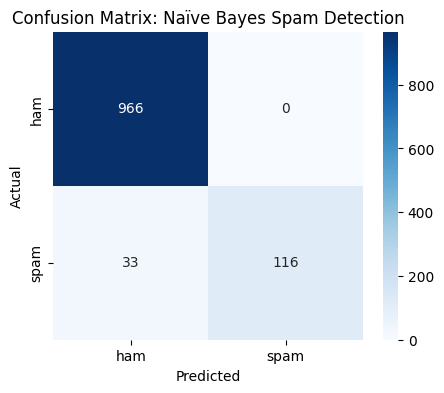

In [30]:
# spam_detection_nb_online.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def main():
    # Load dataset directly from GitHub (SMS Spam Collection)
    url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
    df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

    # Encode labels: ham=0, spam=1
    df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

    X = df['message']
    y = df['label_num']

    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Convert email/text messages to TF-IDF features
    vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Train Multinomial Naïve Bayes classifier
    nb_model = MultinomialNB(alpha=1.0)  # Laplace smoothing
    nb_model.fit(X_train_tfidf, y_train)

    # Make predictions
    y_pred = nb_model.predict(X_test_tfidf)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of Naïve Bayes Spam Classifier: {accuracy:.3f}\n")

    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix: Naïve Bayes Spam Detection")
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
# 34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and
#.    compare their accuracy

Naïve Bayes Accuracy: 0.970

Naïve Bayes Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



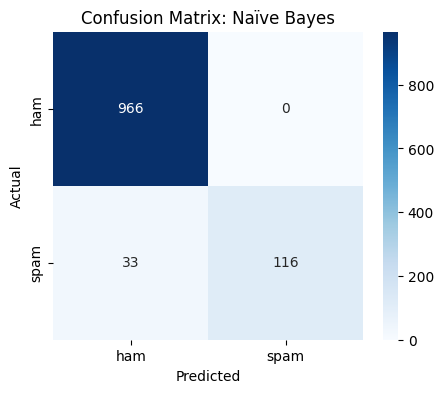

SVM Accuracy: 0.984

SVM Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



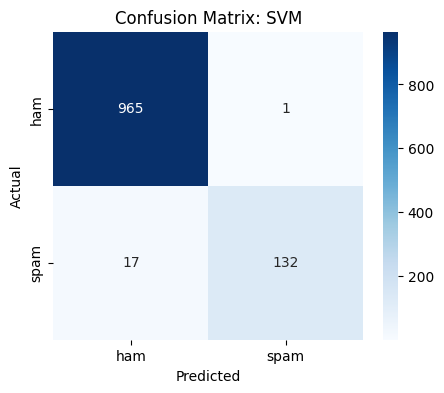

Comparison of Accuracies:
Naïve Bayes: 0.970 | SVM: 0.984


In [31]:
# compare_svm_nb.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(y_test, y_pred, model_name="Model"):
    """Helper function to evaluate and visualize model performance."""
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.3f}\n")
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

    return accuracy

def main():
    # Load SMS Spam dataset from GitHub
    url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
    df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

    # Encode labels: ham=0, spam=1
    df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

    X = df['message']
    y = df['label_num']

    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # TF-IDF vectorization
    vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # ----------------------------
    # 1. Train Naïve Bayes Classifier
    # ----------------------------
    nb_model = MultinomialNB(alpha=1.0)  # Laplace smoothing
    nb_model.fit(X_train_tfidf, y_train)
    y_pred_nb = nb_model.predict(X_test_tfidf)
    acc_nb = evaluate_model(y_test, y_pred_nb, model_name="Naïve Bayes")

    # ----------------------------
    # 2. Train SVM Classifier
    # ----------------------------
    svm_model = SVC(kernel='linear', C=1.0, random_state=42)
    svm_model.fit(X_train_tfidf, y_train)
    y_pred_svm = svm_model.predict(X_test_tfidf)
    acc_svm = evaluate_model(y_test, y_pred_svm, model_name="SVM")

    # ----------------------------
    # Compare accuracies
    # ----------------------------
    print(f"Comparison of Accuracies:\nNaïve Bayes: {acc_nb:.3f} | SVM: {acc_svm:.3f}")

if __name__ == "__main__":
    main()


In [ ]:
# 35. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare
#.    results

Naïve Bayes (All Features) Accuracy: 0.970

Naïve Bayes (All Features) Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



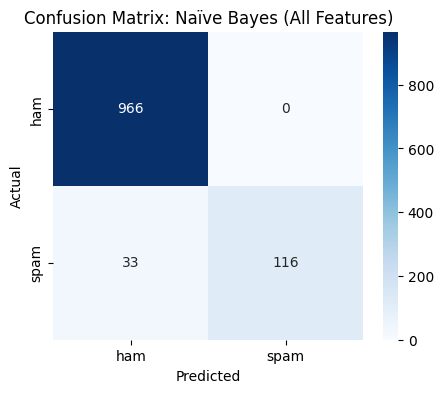

Naïve Bayes (Top 1000 Features) Accuracy: 0.949

Naïve Bayes (Top 1000 Features) Classification Report:
              precision    recall  f1-score   support

         ham       0.94      1.00      0.97       966
        spam       1.00      0.62      0.76       149

    accuracy                           0.95      1115
   macro avg       0.97      0.81      0.87      1115
weighted avg       0.95      0.95      0.94      1115



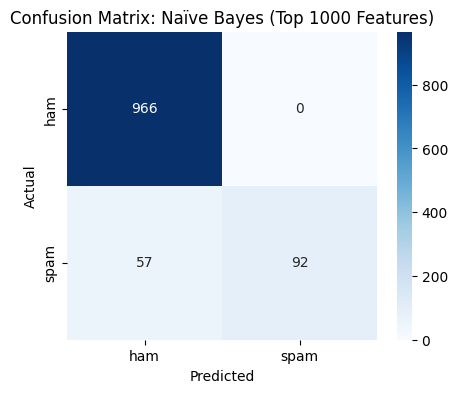

Accuracy Comparison:
Without Feature Selection: 0.970 | With Feature Selection: 0.949


In [32]:
# feature_selection_nb.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(y_test, y_pred, model_name="Model"):
    """Helper function to evaluate model performance and plot confusion matrix."""
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.3f}\n")
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

    return accuracy

def main():
    # Load SMS Spam dataset
    url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
    df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

    # Encode labels: ham=0, spam=1
    df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

    X = df['message']
    y = df['label_num']

    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # TF-IDF vectorization
    vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # ----------------------------
    # 1. Naïve Bayes WITHOUT feature selection
    # ----------------------------
    nb_model = MultinomialNB(alpha=1.0)
    nb_model.fit(X_train_tfidf, y_train)
    y_pred_nb = nb_model.predict(X_test_tfidf)
    acc_without_fs = evaluate_model(y_test, y_pred_nb, model_name="Naïve Bayes (All Features)")

    # ----------------------------
    # 2. Feature Selection using chi-squared
    # ----------------------------
    k = 1000  # Select top 1000 features
    selector = SelectKBest(chi2, k=k)
    X_train_selected = selector.fit_transform(X_train_tfidf, y_train)
    X_test_selected = selector.transform(X_test_tfidf)

    nb_model_fs = MultinomialNB(alpha=1.0)
    nb_model_fs.fit(X_train_selected, y_train)
    y_pred_fs = nb_model_fs.predict(X_test_selected)
    acc_with_fs = evaluate_model(y_test, y_pred_fs, model_name=f"Naïve Bayes (Top {k} Features)")

    # ----------------------------
    # Compare accuracies
    # ----------------------------
    print(f"Accuracy Comparison:\nWithout Feature Selection: {acc_without_fs:.3f} | With Feature Selection: {acc_with_fs:.3f}")

if __name__ == "__main__":
    main()


In [ ]:
# 36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO)
#.    strategies on the Wine dataset and compare their accuracy

In [33]:
# svm_multiclass_wine.py

import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score, classification_report

def main():
    # Load Wine dataset
    wine = load_wine()
    X = wine.data
    y = wine.target
    feature_names = wine.feature_names
    target_names = wine.target_names

    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Feature scaling for SVM
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # ----------------------------
    # 1. One-vs-Rest (OvR) strategy
    # ----------------------------
    ovr_model = OneVsRestClassifier(SVC(kernel='linear', C=1.0, random_state=42))
    ovr_model.fit(X_train_scaled, y_train)
    y_pred_ovr = ovr_model.predict(X_test_scaled)
    acc_ovr = accuracy_score(y_test, y_pred_ovr)
    print(f"One-vs-Rest (OvR) Accuracy: {acc_ovr:.3f}")
    print("Classification Report (OvR):")
    print(classification_report(y_test, y_pred_ovr, target_names=target_names))

    # ----------------------------
    # 2. One-vs-One (OvO) strategy
    # ----------------------------
    ovo_model = OneVsOneClassifier(SVC(kernel='linear', C=1.0, random_state=42))
    ovo_model.fit(X_train_scaled, y_train)
    y_pred_ovo = ovo_model.predict(X_test_scaled)
    acc_ovo = accuracy_score(y_test, y_pred_ovo)
    print(f"One-vs-One (OvO) Accuracy: {acc_ovo:.3f}")
    print("Classification Report (OvO):")
    print(classification_report(y_test, y_pred_ovo, target_names=target_names))

    # ----------------------------
    # Comparison
    # ----------------------------
    print(f"\nAccuracy Comparison:\nOvR: {acc_ovr:.3f} | OvO: {acc_ovo:.3f}")

if __name__ == "__main__":
    main()


One-vs-Rest (OvR) Accuracy: 0.944
Classification Report (OvR):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.80      0.89        10

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

One-vs-One (OvO) Accuracy: 0.944
Classification Report (OvO):
              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        12
     class_1       0.93      0.93      0.93        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36


Accuracy Comparison:
OvR: 0.944 | OvO: 0.944


In [ ]:
# 37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast
#.    Cancer dataset and compare their accuracy

In [34]:
# svm_kernels_breast_cancer.py

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

def main():
    # Load Breast Cancer dataset
    data = load_breast_cancer()
    X = data.data
    y = data.target
    feature_names = data.feature_names
    target_names = data.target_names

    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Dictionary to store models and their accuracies
    kernel_results = {}

    # List of kernels to train
    kernels = ['linear', 'poly', 'rbf']

    for kernel in kernels:
        print(f"Training SVM with {kernel} kernel...")
        model = SVC(kernel=kernel, C=1.0, random_state=42)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        kernel_results[kernel] = acc
        print(f"{kernel.capitalize()} Kernel Accuracy: {acc:.3f}")
        print(f"Classification Report ({kernel} kernel):")
        print(classification_report(y_test, y_pred, target_names=target_names))
        print("-" * 50)

    # Compare accuracies
    print("\nAccuracy Comparison Across Kernels:")
    for k, v in kernel_results.items():
        print(f"{k.capitalize():<10} : {v:.3f}")

if __name__ == "__main__":
    main()


Training SVM with linear kernel...
Linear Kernel Accuracy: 0.974
Classification Report (linear kernel):
              precision    recall  f1-score   support

   malignant       0.95      0.98      0.96        42
      benign       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

--------------------------------------------------
Training SVM with poly kernel...
Poly Kernel Accuracy: 0.912
Classification Report (poly kernel):
              precision    recall  f1-score   support

   malignant       1.00      0.76      0.86        42
      benign       0.88      1.00      0.94        72

    accuracy                           0.91       114
   macro avg       0.94      0.88      0.90       114
weighted avg       0.92      0.91      0.91       114

--------------------------------------------------
Training SVM with rbf kernel...
Rbf Kernel

In [ ]:
# 38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the
#.    average accuracy

In [35]:
# svm_stratified_kfold.py

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def main():
    # Load dataset
    data = load_breast_cancer()
    X = data.data
    y = data.target

    # Feature scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Stratified K-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []

    for fold, (train_index, test_index) in enumerate(skf.split(X_scaled, y), 1):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train SVM classifier
        model = SVC(kernel='linear', C=1.0, random_state=42)
        model.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
        print(f"Fold {fold} Accuracy: {acc:.3f}")

    # Compute average accuracy
    avg_accuracy = np.mean(accuracies)
    print(f"\nAverage Accuracy across {skf.get_n_splits()} folds: {avg_accuracy:.3f}")

if __name__ == "__main__":
    main()


Fold 1 Accuracy: 0.991
Fold 2 Accuracy: 0.947
Fold 3 Accuracy: 0.956
Fold 4 Accuracy: 0.991
Fold 5 Accuracy: 0.991

Average Accuracy across 5 folds: 0.975


In [ ]:
# 39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare
#.    performance


Training GaussianNB (Default Priors)...
GaussianNB (Default Priors) Accuracy: 0.930
Classification Report (GaussianNB (Default Priors)):
              precision    recall  f1-score   support

   malignant       0.90      0.90      0.90        42
      benign       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



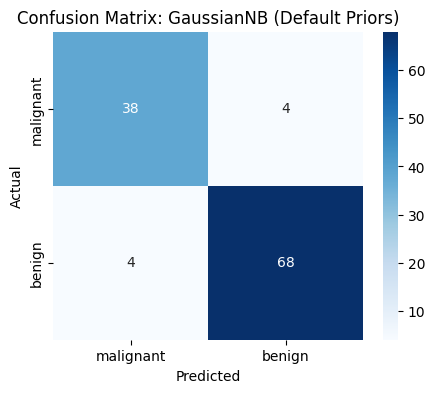


Training GaussianNB (Priors=[0.5, 0.5])...
GaussianNB (Priors=[0.5, 0.5]) Accuracy: 0.930
Classification Report (GaussianNB (Priors=[0.5, 0.5])):
              precision    recall  f1-score   support

   malignant       0.90      0.90      0.90        42
      benign       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



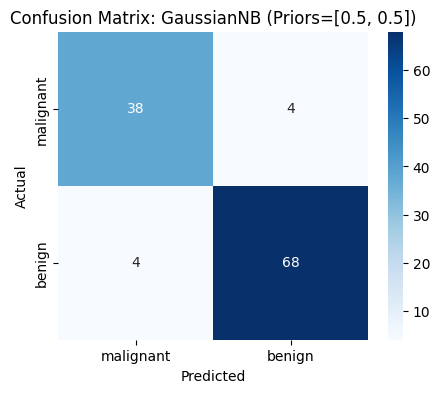


Training GaussianNB (Priors=[0.3, 0.7])...
GaussianNB (Priors=[0.3, 0.7]) Accuracy: 0.930
Classification Report (GaussianNB (Priors=[0.3, 0.7])):
              precision    recall  f1-score   support

   malignant       0.90      0.90      0.90        42
      benign       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



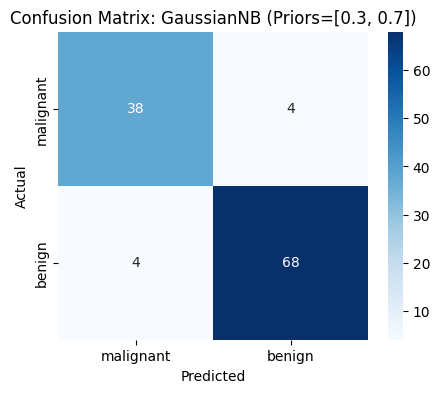


Accuracy Comparison for Different Priors:
GaussianNB (Default Priors)              : 0.930
GaussianNB (Priors=[0.5, 0.5])           : 0.930
GaussianNB (Priors=[0.3, 0.7])           : 0.930


In [36]:
# naive_bayes_priors.py

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(y_test, y_pred, model_name="Model"):
    """Evaluate model performance and plot confusion matrix."""
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {acc:.3f}")
    print(f"Classification Report ({model_name}):")
    print(classification_report(y_test, y_pred, target_names=['malignant', 'benign']))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['malignant', 'benign'], yticklabels=['malignant', 'benign'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

    return acc

def main():
    # Load dataset
    data = load_breast_cancer()
    X = data.data
    y = data.target

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define different prior probabilities to test
    priors_list = [
        None,                 # Let the model use class distribution from data
        [0.5, 0.5],           # Equal prior for both classes
        [0.3, 0.7],           # Custom prior: 30% malignant, 70% benign
    ]

    # Store accuracies for comparison
    accuracy_results = {}

    for i, priors in enumerate(priors_list, 1):
        if priors is None:
            model_name = f"GaussianNB (Default Priors)"
        else:
            model_name = f"GaussianNB (Priors={priors})"

        print(f"\nTraining {model_name}...")
        nb_model = GaussianNB(priors=priors)
        nb_model.fit(X_train_scaled, y_train)
        y_pred = nb_model.predict(X_test_scaled)
        acc = evaluate_model(y_test, y_pred, model_name=model_name)
        accuracy_results[model_name] = acc

    # Compare accuracies
    print("\nAccuracy Comparison for Different Priors:")
    for name, acc in accuracy_results.items():
        print(f"{name:<40} : {acc:.3f}")

if __name__ == "__main__":
    main()


In [ ]:
# 40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and
#.    compare accuracy

In [37]:
# svm_rfe_breast_cancer.py

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report

def evaluate_model(y_test, y_pred, model_name="Model"):
    """Evaluate model performance and print classification report."""
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {acc:.3f}")
    print(f"Classification Report ({model_name}):")
    print(classification_report(y_test, y_pred, target_names=['malignant', 'benign']))
    print("-" * 50)
    return acc

def main():
    # Load dataset
    data = load_breast_cancer()
    X = data.data
    y = data.target
    feature_names = data.feature_names

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # ----------------------------
    # 1. SVM without feature selection
    # ----------------------------
    svm_model = SVC(kernel='linear', C=1.0, random_state=42)
    svm_model.fit(X_train_scaled, y_train)
    y_pred = svm_model.predict(X_test_scaled)
    acc_without_rfe = evaluate_model(y_test, y_pred, model_name="SVM (All Features)")

    # ----------------------------
    # 2. Recursive Feature Elimination (RFE)
    # ----------------------------
    # Select top 15 features
    rfe_selector = RFE(estimator=SVC(kernel='linear', C=1.0, random_state=42), n_features_to_select=15, step=1)
    rfe_selector.fit(X_train_scaled, y_train)

    # Transform training and test sets
    X_train_rfe = rfe_selector.transform(X_train_scaled)
    X_test_rfe = rfe_selector.transform(X_test_scaled)

    # Train SVM on selected features
    svm_rfe = SVC(kernel='linear', C=1.0, random_state=42)
    svm_rfe.fit(X_train_rfe, y_train)
    y_pred_rfe = svm_rfe.predict(X_test_rfe)
    acc_with_rfe = evaluate_model(y_test, y_pred_rfe, model_name="SVM (RFE 15 Features)")

    # ----------------------------
    # Compare accuracies
    # ----------------------------
    print(f"Accuracy Comparison:\nWithout RFE: {acc_without_rfe:.3f} | With RFE (15 Features): {acc_with_rfe:.3f}")

    # ----------------------------
    # Optional: show selected feature names
    # ----------------------------
    selected_features = feature_names[rfe_selector.support_]
    print("\nSelected Features by RFE (Top 15):")
    print(selected_features)

if __name__ == "__main__":
    main()


SVM (All Features) Accuracy: 0.974
Classification Report (SVM (All Features)):
              precision    recall  f1-score   support

   malignant       0.95      0.98      0.96        42
      benign       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

--------------------------------------------------
SVM (RFE 15 Features) Accuracy: 0.956
Classification Report (SVM (RFE 15 Features)):
              precision    recall  f1-score   support

   malignant       0.93      0.95      0.94        42
      benign       0.97      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

--------------------------------------------------
Accuracy Comparison:
Without RFE: 0.974 | With RFE (15 Features): 0.956

Selecte

In [ ]:
# 41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and
#.    F1-Score instead of accuracy

In [38]:
# svm_precision_recall_f1.py

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

def main():
    # Load dataset
    data = load_breast_cancer()
    X = data.data
    y = data.target
    target_names = data.target_names  # ['malignant', 'benign']

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train SVM Classifier
    svm_model = SVC(kernel='linear', C=1.0, random_state=42)
    svm_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = svm_model.predict(X_test_scaled)

    # Evaluate performance using Precision, Recall, and F1-Score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("SVM Classifier Performance Metrics:")
    print(f"Precision: {precision:.3f}")
    print(f"Recall   : {recall:.3f}")
    print(f"F1-Score : {f1:.3f}\n")

    # Detailed classification report
    print("Detailed Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

if __name__ == "__main__":
    main()


SVM Classifier Performance Metrics:
Precision: 0.986
Recall   : 0.972
F1-Score : 0.979

Detailed Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.98      0.96        42
      benign       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
# 42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss
#.    (Cross-Entropy Loss)

In [39]:
# naive_bayes_logloss.py

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss, classification_report, accuracy_score

def main():
    # Load dataset
    data = load_breast_cancer()
    X = data.data
    y = data.target
    target_names = data.target_names  # ['malignant', 'benign']

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Feature scaling (optional but improves numerical stability for some NB implementations)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train Gaussian Naïve Bayes Classifier
    nb_model = GaussianNB()
    nb_model.fit(X_train_scaled, y_train)

    # Predict probabilities (needed for Log Loss)
    y_prob = nb_model.predict_proba(X_test_scaled)

    # Predict class labels
    y_pred = nb_model.predict(X_test_scaled)

    # Evaluate Log Loss
    logloss = log_loss(y_test, y_prob)
    print(f"Gaussian Naïve Bayes Log Loss: {logloss:.3f}\n")

    # Additional metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.3f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

if __name__ == "__main__":
    main()


Gaussian Naïve Bayes Log Loss: 0.437

Accuracy: 0.930

Classification Report:
              precision    recall  f1-score   support

   malignant       0.90      0.90      0.90        42
      benign       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [ ]:
# 43.  Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn

SVM Classifier Accuracy: 0.974

Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.98      0.96        42
      benign       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



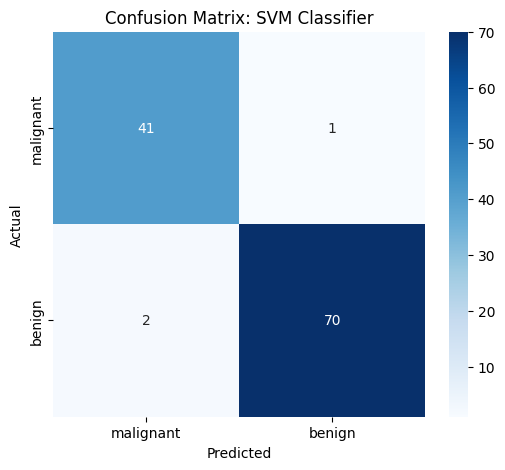

In [40]:
# svm_confusion_matrix.py

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def main():
    # Load Breast Cancer dataset
    data = load_breast_cancer()
    X = data.data
    y = data.target
    target_names = data.target_names  # ['malignant', 'benign']

    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train SVM Classifier
    svm_model = SVC(kernel='linear', C=1.0, random_state=42)
    svm_model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = svm_model.predict(X_test_scaled)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"SVM Classifier Accuracy: {accuracy:.3f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualize using seaborn heatmap
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix: SVM Classifier")
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
# 44. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute
#.    Error (MAE) instead of MSE

In [42]:
# svr_mae.py

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

def main():
    # Load California Housing dataset
    data = fetch_california_housing()
    X = data.data
    y = data.target

    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train SVR model
    svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
    svr_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = svr_model.predict(X_test_scaled)

    # Evaluate performance using Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("SVR Model Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.3f}")
    print(f"R^2 Score               : {r2:.3f}")

if __name__ == "__main__":
    main()


SVR Model Performance:
Mean Absolute Error (MAE): 0.374
R^2 Score               : 0.752


In [ ]:
# 45. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC
#     score

Gaussian Naïve Bayes ROC-AUC Score: 0.987

Classification Report:
              precision    recall  f1-score   support

   malignant       0.90      0.90      0.90        42
      benign       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



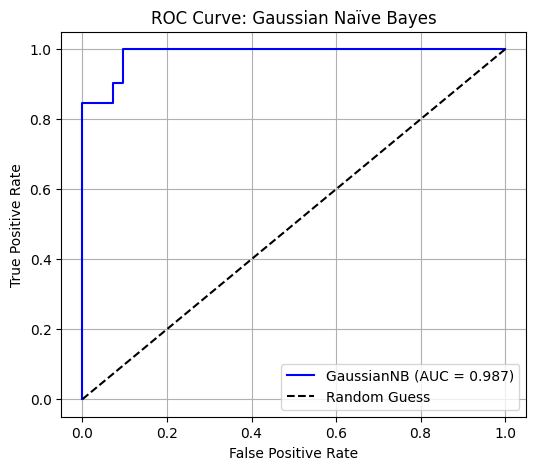

In [43]:
# naive_bayes_roc_auc.py

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

def main():
    # Load dataset
    data = load_breast_cancer()
    X = data.data
    y = data.target
    target_names = data.target_names  # ['malignant', 'benign']

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Feature scaling (optional but improves numerical stability)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train Gaussian Naïve Bayes classifier
    nb_model = GaussianNB()
    nb_model.fit(X_train_scaled, y_train)

    # Predict class probabilities (needed for ROC-AUC)
    y_prob = nb_model.predict_proba(X_test_scaled)[:, 1]  # probability for positive class

    # Predict class labels
    y_pred = nb_model.predict(X_test_scaled)

    # Compute ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"Gaussian Naïve Bayes ROC-AUC Score: {roc_auc:.3f}\n")

    # Detailed classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f'GaussianNB (AUC = {roc_auc:.3f})', color='blue')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve: Gaussian Naïve Bayes')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
# 46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve

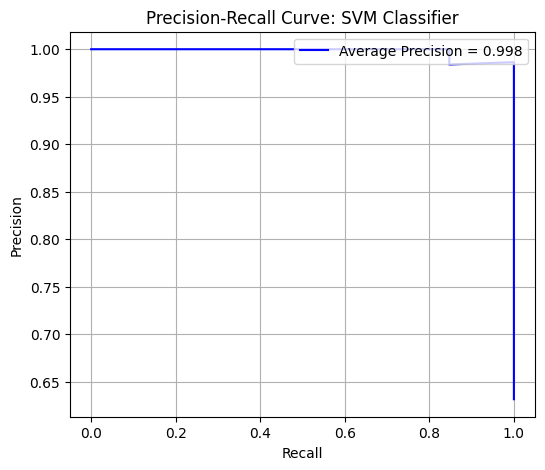

Average Precision Score: 0.998


In [44]:
# svm_precision_recall_curve.py

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score

def main():
    # Load dataset
    data = load_breast_cancer()
    X = data.data
    y = data.target

    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train SVM classifier with linear kernel
    svm_model = SVC(kernel='linear', C=1.0, random_state=42, probability=True)
    svm_model.fit(X_train_scaled, y_train)

    # Predict probabilities for the positive class
    y_scores = svm_model.decision_function(X_test_scaled)  # use decision_function for precision-recall

    # Compute precision, recall, and thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    avg_precision = average_precision_score(y_test, y_scores)

    # Plot Precision-Recall curve
    plt.figure(figsize=(6,5))
    plt.plot(recall, precision, color='blue', label=f'Average Precision = {avg_precision:.3f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve: SVM Classifier')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

    print(f"Average Precision Score: {avg_precision:.3f}")

if __name__ == "__main__":
    main()
